### importing library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
import warnings
import tensorflow as tf 
import keras
import numpy as np 
from sklearn import metrics
import seaborn as sn

warnings.filterwarnings("ignore")

### Loading dataset

In [2]:
# read credit card dataset 
data  = pd.read_csv("dataset/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
data.sample(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
173792,121641.0,2.046648,-0.353506,-3.095606,-0.665970,2.687649,3.132674,-0.128509,0.652132,0.232902,...,-0.029061,-0.024023,0.104252,0.762032,0.208187,0.580192,-0.080770,-0.080875,19.99,0
148895,90296.0,0.116804,1.124966,-0.189357,-0.411574,1.179856,-0.677778,1.114330,-0.460061,1.417527,...,-0.532265,-0.991069,0.079980,0.418580,-0.452823,0.039088,-0.097230,-0.151803,8.99,0
35591,38185.0,1.499932,-1.116091,0.331023,-1.507845,-1.343854,-0.425100,-1.058648,-0.125675,-1.673903,...,-0.405737,-0.888702,0.048909,-0.501700,0.229217,-0.361453,0.035387,0.026757,45.00,0
116723,74401.0,1.126290,-0.261607,1.336489,0.896358,-1.156933,-0.048139,-0.780051,0.256491,1.075626,...,-0.059349,0.015249,0.120246,0.417683,0.102396,0.330315,0.027593,0.023757,2.86,0


### Data exploration

In [5]:
rows, col = data.shape
print("Rows Count : {}            Column Count : {}".format(rows, col))

Rows Count : 284807            Column Count : 31


In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
data[data.columns[:3]]

,Time,V1,V2
0,0.0,-1.359807,-0.072781
1,0.0,1.191857,0.266151
2,1.0,-1.358354,-1.340163
3,1.0,-0.966272,-0.185226
4,2.0,-1.158233,0.877737
...,...,...,...
284802,172786.0,-11.881118,10.071785
284803,172787.0,-0.732789,-0.055080
284804,172788.0,1.919565,-0.301254
284805,172788.0,-0.240440,0.530483


In [8]:
data[data.columns[-3:]]

,V28,Amount,Class
0,-0.021053,149.62,0
1,0.014724,2.69,0
2,-0.059752,378.66,0
3,0.061458,123.50,0
4,0.215153,69.99,0
...,...,...,...
284802,0.823731,0.77,0
284803,-0.053527,24.79,0
284804,-0.026561,67.88,0
284805,0.104533,10.00,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
duplicate = data.duplicated().sum()
print("Numbers of Duplicate: {}".format(duplicate))

Numbers of Duplicate: 1081


In [12]:
print('Duplicate Samples.....')
print("===========================")
data[data.duplicated]

Duplicate Samples.....


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


class_0 : 284315   Class_1 : 492


<Axes: xlabel='[{0:Non-fraudulent}, {1:fraudulent}]'>

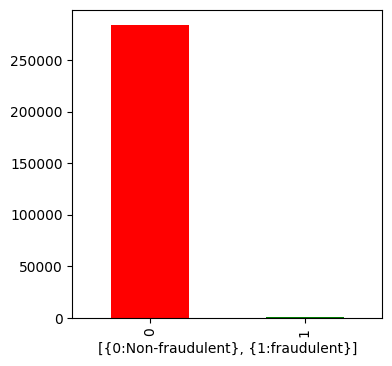

In [13]:
val_one , val_two = data.Class.value_counts()
print("class_0 : {}   Class_1 : {}".format(val_one, val_two))
plt.figure(figsize=(4, 4))
data.Class.value_counts().plot(kind='bar', color=['red', 'green'], xlabel=["{0:Non-fraudulent}" , '{1:fraudulent}'])

Text(0.5, 0, 'Data Distribution of Time (Millisecond)')

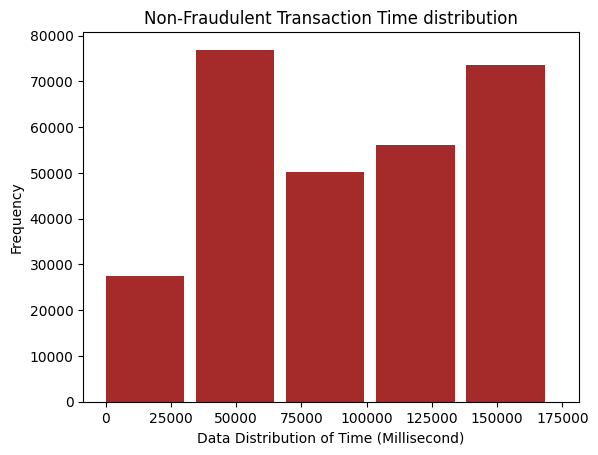

In [14]:
data[data.Class == 0].Time.plot(kind='hist' , bins=5, width=30000, color=['brown', 'b', 'g'])
plt.title("Non-Fraudulent Transaction Time distribution")
plt.xlabel("Data Distribution of Time (Millisecond)")

Text(0.5, 0, 'Data Distribution of Time (Millisecond)')

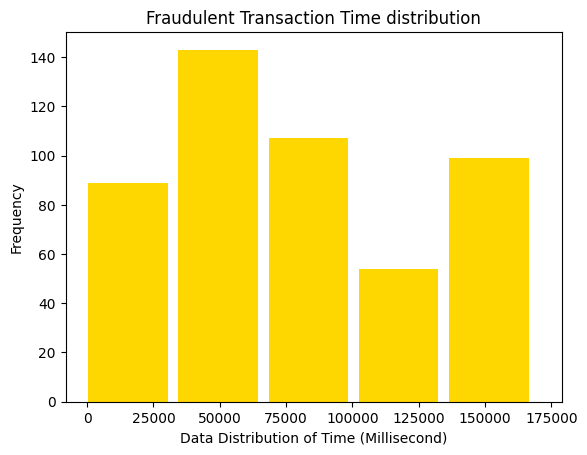

In [15]:
data[data.Class == 1].Time.plot(kind='hist' , bins=5, width=30000, color=['gold', 'b', 'g'])
plt.title("Fraudulent Transaction Time distribution")
plt.xlabel("Data Distribution of Time (Millisecond)")

In [16]:
clean_data.Amount.plot(kind='line', color='g')
plt.xlabel("Data distribution of Amount Attribute")

NameError: name 'clean_data' is not defined

### Data Cleanning

In [17]:
# removing dublicate 
clean_data = data.drop_duplicates()
clean_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [18]:
row , col = clean_data.shape
"Row:{}      Col:{}".format(row, col)

'Row:283726      Col:31'

### Data Normalization

In [19]:
scal_att = data[["Time", "Amount"]]
scal_att

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99
...,...,...
284802,172786.0,0.77
284803,172787.0,24.79
284804,172788.0,67.88
284805,172788.0,10.00


In [20]:
# Normalize highly distributed Data..... (Time and Amount)
min_max = MinMaxScaler()
min_max

MinMaxScaler()

In [21]:
time = min_max.fit_transform(clean_data[['Time']])
amt = min_max.fit_transform(clean_data[['Amount']])

In [22]:
clean_data.Time  = time 
clean_data.Amount = amt

In [23]:
clean_data[["Time", "Amount"]]

,Time,Amount
0,0.000000,0.005824
1,0.000000,0.000105
2,0.000006,0.014739
3,0.000006,0.004807
4,0.000012,0.002724
...,...,...
284802,0.999965,0.000030
284803,0.999971,0.000965
284804,0.999977,0.002642
284805,0.999977,0.000389


In [24]:
clean_data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0


### Data Splitting

In [25]:
y = clean_data.Class 
X = clean_data.drop(columns=['Class'])
y[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Class, dtype: int64

In [26]:
X.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
262548,0.929019,-4.330169,3.991023,-4.269741,-0.749442,-1.714040,-0.733826,-1.969786,3.534529,-0.346676,...,0.082874,-0.181568,-1.010950,0.418062,0.105148,0.118455,0.164635,-0.032127,-0.035026,0.000700
164465,0.675581,0.394781,-0.537086,0.495576,-2.566372,-0.744379,-0.254445,-0.485483,-0.073244,-1.627469,...,-0.407163,-0.086456,0.155270,0.032334,0.548720,-0.462764,-0.284775,-0.065732,0.005497,0.000553
269129,0.946473,-1.538716,0.624026,0.117523,-3.329418,-0.272319,-0.697685,-0.212069,0.974936,0.879356,...,-0.264750,-0.012240,-0.236405,0.150990,0.689337,-0.478411,-0.862718,0.042018,0.043887,0.000250
49509,0.255168,-2.035438,1.928462,0.070161,-0.738047,-0.719251,-0.431644,-0.451361,1.430319,-0.059101,...,-0.096179,-0.125187,-0.430721,0.079554,-0.272775,-0.078053,0.361608,0.150573,0.105987,0.000039
104408,0.399642,-0.331839,-2.067034,-0.726058,1.694943,-0.566522,0.045654,1.286030,-0.242640,-0.671277,...,1.457837,0.527788,-0.166018,-0.767902,0.073950,0.360632,-0.414877,-0.126703,0.139947,0.030353


In [28]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=.8)

print("X train :{}   \nX test :{}   \ny train :{}   \ny test:{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X train :(226980, 30)   
X test :(56746, 30)   
y train :(226980,)   
y test:(56746,)


In [29]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.datasets import load_digits

In [ ]:
log_clf = LogisticRegression(max_iter=500)
rf_clf = RandomForestClassifier(n_estimators=100)
svc_clf = SVC(probability=True)

# Create an ensemble using VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('rf', rf_clf),
        ('svc', svc_clf)
    ],
    voting='soft'  # 'hard' for majority voting, 'soft' for probability-based
)

In [30]:
# Training the distributed learning model

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fi_score = f1_score(y_test, y_pred)

KeyboardInterrupt: 

In [ ]:
# MOdel Evaluation
# report
class_report = metrics.classification_report(y_test, y_prediction)
print("            \n            Classification Report")
print("     =============================================")
print(class_report)

In [ ]:
# report
conf_matrix = metrics.confusion_matrix(y_test, prediction)
sn.heatmap(conf_matrix,fmt="d", annot=True , xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title("Finanacial Fruad Cyber attack Confusion Matrix")
plt.show()

### Training without Balancing (DNN)

In [29]:
dnn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(30,)), 
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

dnn_model.compile(
    optimizer='adam', 
    metrics=['accuracy'], 
    loss = "binary_crossentropy"
)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                744       
                                                                 
 dense_1 (Dense)             (None, 15)                375       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,135
Trainable params: 1,135
Non-trainable params: 0
_________________________________________________________________


In [30]:
train_hist = dnn_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
7094/7094 [==============================] - 28s 4ms/step - loss: 0.0092 - accuracy: 0.9986
Epoch 2/5
7094/7094 [==============================] - 26s 4ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 3/5
7094/7094 [==============================] - 25s 4ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 4/5
7094/7094 [==============================] - 26s 4ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 5/5
7094/7094 [==============================] - 26s 4ms/step - loss: 0.0023 - accuracy: 0.9995


[]

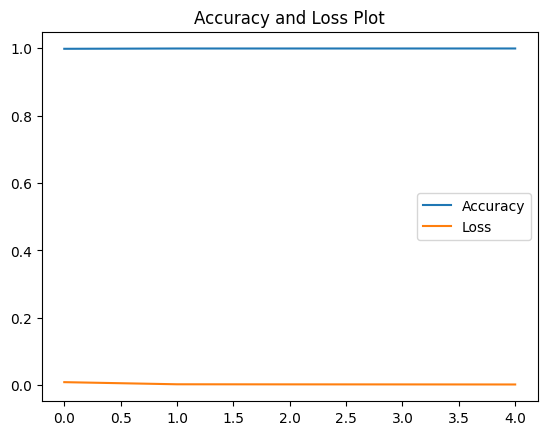

In [31]:
acc = train_hist.history['accuracy']
loss = train_hist.history['loss']

plt.title('Accuracy and Loss Plot')
plt.plot(acc, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()

plt.plot()

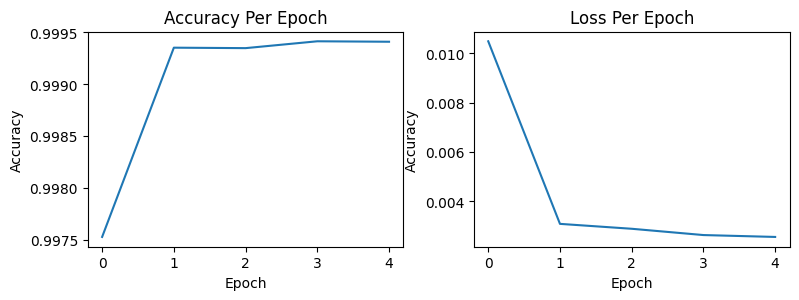

In [32]:
acc = train_hist.history['accuracy']
loss = train_hist.history['loss']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plt.tight_layout(pad=2)
ax[0].plot(acc)
ax[0].set_title("Accuracy Per Epoch")
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epoch")

ax[1].plot(loss)
ax[1].set_title("Loss Per Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")

plt.show()

In [166]:
# dir(ax[0])

In [65]:
dnn_predict = dnn_model.predict(X_test)
dnn_predict

1774/1774 [==============================] - 5s 3ms/step


array([[2.7319763e-04],
       [1.4149578e-05],
       [3.0416484e-05],
       ...,
       [8.1241960e-05],
       [2.0932870e-04],
       [1.3465721e-04]], dtype=float32)

In [68]:
import numpy as np 

In [102]:
prediction =  [1 if pre > 0.5 else 0 for pre in dnn_predict]
print(prediction[:300])

# report
class_report = metrics.classification_report(y_test, prediction)
print("            \n            Classification Report")
print("     =============================================")
print(class_report)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
            
            Classification Report
              precision    recall  f1-score   suppor

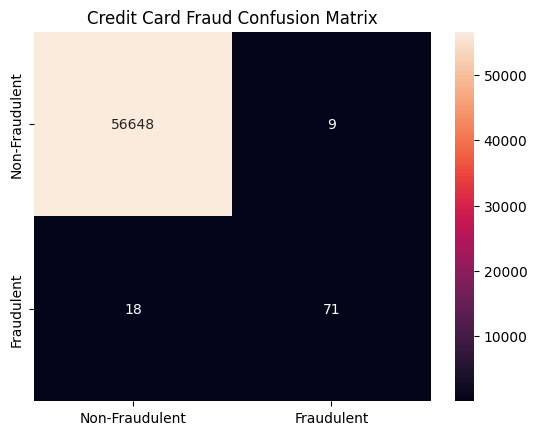

In [111]:
# report
conf_matrix = metrics.confusion_matrix(y_test, prediction)
sn.heatmap(conf_matrix,fmt="d", annot=True , xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title("Credit Card Fraud Confusion Matrix")
plt.show()

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X, y)
print("X sample   :{}  |   y   sample :{}".format(X.shape, y.shape))
print("X resmaple :{}     y resample :{}".format(X_res.shape, y_res.shape))

### Data Balancing

In [167]:
from imblearn.combine import SMOTEENN

In [172]:
smote_enn = SMOTEENN(random_state=42)
X_res, y_res = smote_enn.fit_resample(X, y)

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X, y)

In [174]:
print("X sample   :{}  |   y   sample :{}".format(X.shape, y.shape))
print("X resmaple :{}     y resample :{}".format(X_res.shape, y_res.shape))

X sample   :(283726, 30) y   sample :(283726,)
X resmaple :(566098, 30) y resample :(566098,)


In [177]:
X_res.to_csv("X_resampled")
y_res.to_csv("y_resampled")

In [4]:
import pandas as pd 
X = pd.read_csv("X_resampled", )
y = pd.read_csv("y_resampled")

1    283253
0    282845
Name: Class, dtype: int64


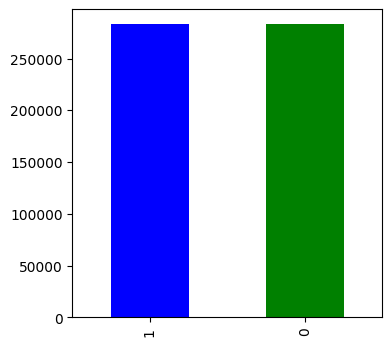

In [24]:
print(y.Class.value_counts())
print("===============================")
plt.figure(figsize=(4,4))
y.Class.value_counts().plot(kind='bar', color=['b', 'green'])
# plt.xticks(['Non-frudulent', 'frudulent'])
plt.show()

### Train Test Sample

In [178]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_res, y_res, train_size=.8)
print("X train :{}   \nX test :{}   \ny train :{}   \ny test:{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X train :(452878, 30)   
X test :(113220, 30)   
y train :(452878,)   
y test:(113220,)


### Training (DNN) using SMOTEENN Balanced dataset 

In [185]:
dnn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(30,)), 
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

dnn_model.compile(
    optimizer='adam', 
    metrics=['accuracy'], 
    loss = "binary_crossentropy"
)
dnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                744       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_13 (Dense)            (None, 15)                375       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1,135
Trainable params: 1,135
Non-trainable params: 0
_________________________________________________________________


In [186]:
train_hist = dnn_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
14153/14153 [==============================] - 27s 2ms/step - loss: 0.1124 - accuracy: 0.9530
Epoch 2/5
14153/14153 [==============================] - 27s 2ms/step - loss: 0.0610 - accuracy: 0.9730
Epoch 3/5
14153/14153 [==============================] - 25s 2ms/step - loss: 0.0580 - accuracy: 0.9743
Epoch 4/5
14153/14153 [==============================] - 35s 3ms/step - loss: 0.0564 - accuracy: 0.9758
Epoch 5/5
14153/14153 [==============================] - 39s 3ms/step - loss: 0.0550 - accuracy: 0.9764


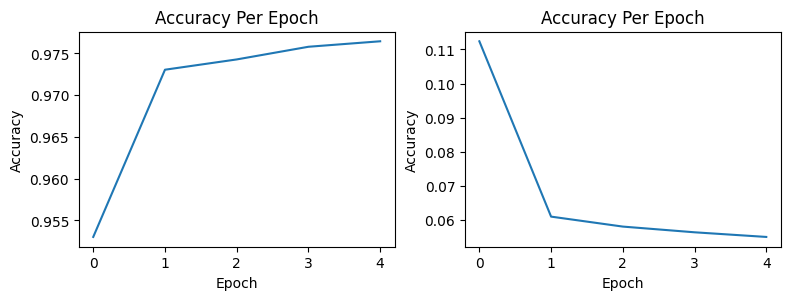

In [187]:
acc = train_hist.history['accuracy']
loss = train_hist.history['loss']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plt.tight_layout(pad=2)
ax[0].plot(acc)
ax[0].set_title("Accuracy Per Epoch")
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epoch")

ax[1].plot(loss)
ax[1].set_title("Loss Per Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")

plt.show()

In [188]:
dnn_predict = dnn_model.predict(X_test)
dnn_predict

3539/3539 [==============================] - 4s 1ms/step


array([[0.0000000e+00],
       [7.9120827e-01],
       [7.4620962e-01],
       ...,
       [2.3159196e-20],
       [4.0228215e-06],
       [0.0000000e+00]], dtype=float32)

In [192]:
acc_score = metrics.accuracy_score(y_test, prediction)
acc_score

0.9943296237413884

In [189]:
prediction =  [1 if pre > 0.5 else 0 for pre in dnn_predict]
print(prediction[:300])

# report
class_report = metrics.classification_report(y_test, prediction)
print("            \n            Classification Report")
print("     =============================================")
print(class_report)

[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
            
            Classification Report
              precision    recall  f1-score   suppor

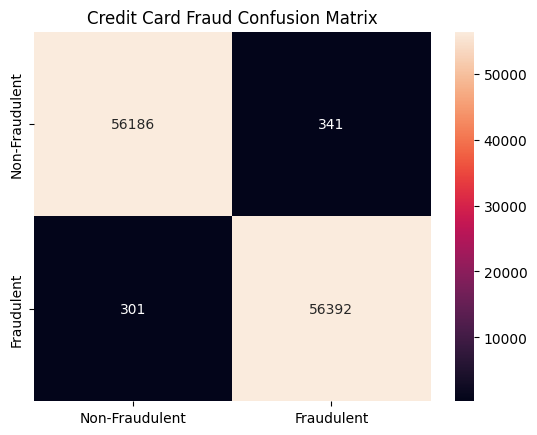

In [190]:
# report
conf_matrix = metrics.confusion_matrix(y_test, prediction)
sn.heatmap(conf_matrix,fmt="d", annot=True , xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title("Credit Card Fraud Confusion Matrix")
plt.show()

### Result Preparation

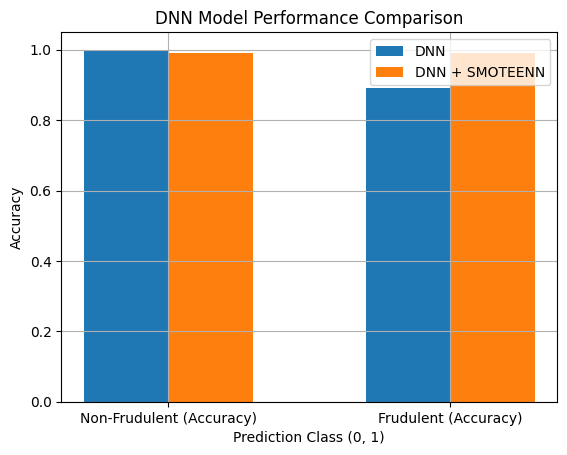

In [30]:
acc = [1, 0.89]
acc_smote_enn = [0.99, 0.99]

range = np.arange(2)
width = 0.3

plt.bar(x=range, height=acc, width=width, label="DNN")
plt.bar(x=range+width, height=acc_smote_enn, width=width, label="DNN + SMOTEENN")
plt.xticks(range+(width/2), ['Non-Frudulent (Accuracy)', 'Frudulent (Accuracy)'])
plt.grid('false')
plt.title("DNN Model Performance Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Prediction Class (0, 1)")
plt.legend()
plt.show()